# Financial risk prediction and classification for loan approval

# 1.Introduction
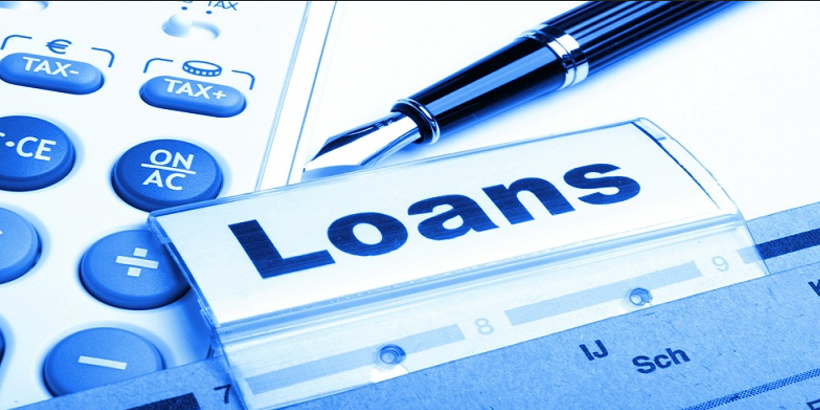

## 1.1. Project description: 

In the modern financial landscape, effective risk assessment and accurate loan approval predictions are crucial for minimizing losses and ensuring the sustainability of financial institutions. The ability to evaluate the financial health and reliability of loan applicants can streamline decision-making processes, reduce defaults, and optimize resource allocation.

This project leverages a synthetic dataset of personal and financial data to address two key challenges:

 **1. Risk Assessment:** Estimating **a continuous Risk Score** that reflects the likelihood of financial instability or default for each applicant.
 
 **2. Loan Approval Prediction:** Developing a binary classification model to determine whether a loan application should be **approved or denied** based on the applicant’s profile.
 
By building robust machine learning models, this project aims to provide insights into key factors influencing risk and loan approval decisions, offering a foundation for improved lending strategies.

## 1.2. Problem satement: 
This project addresses two specific tasks:

 1. Risk Score Prediction: Predict a continuous variable, the RiskScore, which quantifies the risk associated with an individual.
    - Example: Predicting a RiskScore of 0.75 for an applicant suggests a higher likelihood of default than a score of 0.25.
     
 2. Loan Approval Prediction: Perform binary classification to determine the loan approval outcome (LoanApproved = 1 for approval, 0 for denial).
    - Example: Based on the applicant's data, predicting LoanApproved = 0 means the applicant is not eligible for the loan.

## 1.3. Objectives of the project

1. Develop **a regression model** to accurately predict the RiskScore for each applicant (Supervised learning -Offline).
2. Build **a classification model** to predict whether a loan application will be approved (Supervised learning -Offline).
3. Analyze and interpret key features influencing risk and approval decisions.
4. Evaluate the performance of the models using appropriate metrics.
6. Present actionable insights for improving risk assessment and decision-making processes.
7. Give and developpe the solution for this problem in 3 weeks

## 1.4. Dependecies

In [81]:
import pandas as pd 
import sklearn as sk
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pathlib import Path
from sklearn.model_selection import train_test_split


# 2. The big picture

## 2.1. Frame the problem

- Is it	supervised,	unsupervised or Reinforcement Learning?
  
This projects is about supervised learning since we have labeled training examples (each instance has RiskScore and LoanApporval status.

- Is it a classification	task, aregression task or something	else?
  
The project will handle two tasks: classification for classifiing if a demande will be approved or not (binary classification) and regression for predicting a continous variable, the riskSCore.

- Should you	use	batch	learning	or	online	learning	techniques?

There is	no	continuous	flow	of	data	coming	in	the	system,	there	is	no
 particular	need	to	adjust	to	changing	data	rapidly	so	plain	batch	learning	should	do	just	fine.

## 2.2. Measure performance

 - For Regression: for example Mean Squared Error (MSE), Mean Absolute Error (MAE), R².
 - For Classification: for example Accuracy, Precision, Recall, F1 Score, ROC-AUC.
 > we can add something else, but this is the basic measure to be used

# 3. Collecting the data

## 3.1. About Dataset

It's a synthetic sataset for Risk Assessment and Loan Approval Modeling that we toke from Kaggle https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data.

This synthetic dataset comprises 20,000 records and 36 features of personal and financial data, designed to facilitate the development of predictive models for risk assessment. 

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

   - ApplicationDate: Loan application date
   - Age: Applicant's age
   - AnnualIncome: Yearly income
   - CreditScore: Credit worthiness score (for more details see the explanation above)
   - EmploymentStatus: Job situation
   - EducationLevel: Highest education attained
   - Experience: Work experience
   - LoanAmount: Requested loan size
   - LoanDuration: Loan repayment period
   - MaritalStatus: Applicant's marital state
   - NumberOfDependents: Number of dependents
   - HomeOwnershipStatus: Homeownership type
   - MonthlyDebtPayments: Monthly debt obligations
   - CreditCardUtilizationRate: Credit card usage percentage
   - NumberOfOpenCreditLines: Active credit lines
   - NumberOfCreditInquiries: Credit checks count
   - DebtToIncomeRatio: Debt to income proportion
   - BankruptcyHistory: Bankruptcy records
   - LoanPurpose: Reason for loan
   - PreviousLoanDefaults: Prior loan defaults
   - PaymentHistory: Past payment behavior
   - LengthOfCreditHistory: Credit history duration
   - SavingsAccountBalance: Savings account amount
   - CheckingAccountBalance: Checking account funds
   - TotalAssets: Total owned assets
   - TotalLiabilities: Total owed debts
   - MonthlyIncome: Income per month
   - UtilityBillsPaymentHistory: Utility payment record
   - JobTenure: Job duration
   - NetWorth: Total financial worth
   - BaseInterestRate: Starting interest rate
   - InterestRate: Applied interest rate
   - MonthlyLoanPayment: Monthly loan payment
   - TotalDebtToIncomeRatio: Total debt against income
   - LoanApproved: Loan approval status
   - RiskScore: Risk assessment score

**What is credit score?**

According to https://www.financestrategists.com/banking/credit-score/core?

A credit score is a numerical scale ranging from 300 to 850 that reflects a borrower’s trustworthiness. It is based on a person's credit history, including the number of open accounts, total amounts owed, and payment track record4

Lenders look at this to determine if someone will pay back loans on tie.

A high credit score means you are a low-risk borrower, which can lead to better interest rates on loans and credit cards. A low credit score could mean you will pay higher interest rates, or may not be approved for a loan or credit card at all.

**What is the number of dependents?**

It's the number of people you are directly responsible for supporting financially. Example: children or other relatives for whom you pay for most of the necessities of life. It could include others such as an elderly parent who lives with you or a sibling you care form or an adult child who can't care for themselves.

## 3.2. Data loading

In [18]:
DATA =Path("./datasets") # to be changed according to the data folder
assert DATA.exists()

In [19]:
loans_df=pd.read_csv(DATA/"Loan.csv", low_memory=False)
loans_df.shape

(20000, 36)

# 4.Data exploration

## 4.1. Creating a cupy of the data

In [22]:
loans_df_c=DataFrame(loans_df)

## 4.2. Study of the attributes and their caracteristicsorm)

In [24]:
print("\nHead of the dataset Loans:\n", loans_df.head())
print("\nTail of the dataset Loans: \n", loans_df.tail())
print("\nInformations about the dataset Loans: \n", loans_df.info())
print("\n The memory usage \n", loans_df.memory_usage())


Head of the dataset Loans:
   ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000   

***Important remark:***
***The dataset doesn't have any null value.***

In [26]:
#getting all columns
all_columns=list(loans_df.columns)
print("The features of the dataset are: \n", all_columns)
#print("Types of the features: \n", loans_df.dtypes)

The features of the dataset are: 
 ['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


In [27]:
#getting numerical columns 
num_columns=[col for col in all_columns if loans_df[col].dtype != object]
print("The numerical columns are: ", num_columns)
print("\n Statistical description of the numerical columns: \n", loans_df.describe())

#getting categorical columns
cat_columns = [col for col in loans_df.columns if loans_df[col].dtype == object]
print("\n A description of the categorical columns: \n")
for col in cat_columns: 
    print(f"\n {loans_df[col].value_counts()}")

The numerical columns are:  ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

 Statistical description of the numerical columns: 
                 Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min

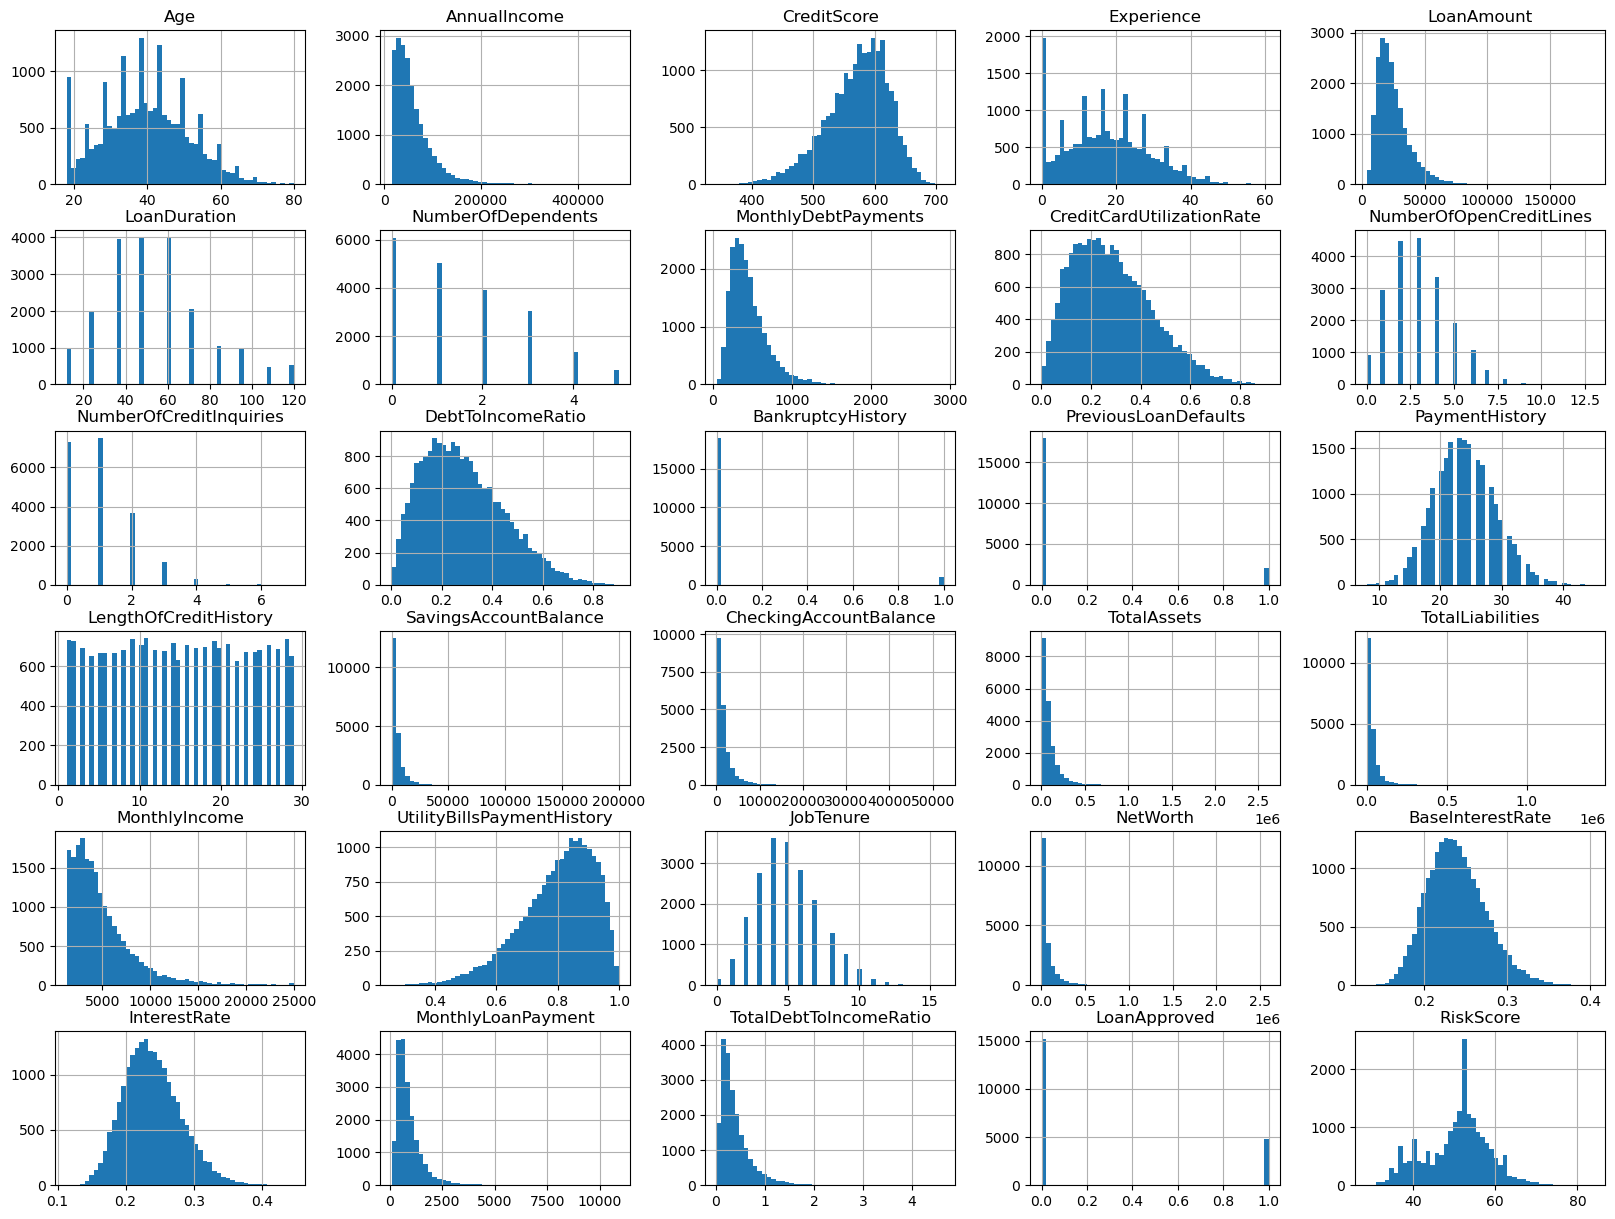

In [28]:
#exploring the numerical columns with histogram technique 
loans_df.hist(bins=50,	figsize=(20,15))
plt.show()

ADD COMMENTS HERE (about each columns, cat/num)

In [30]:
#Let's identify  Noise level and type of noise IDK
#revelance for the task IDK
#distribution 


 > To have i idea about the noise and outliers
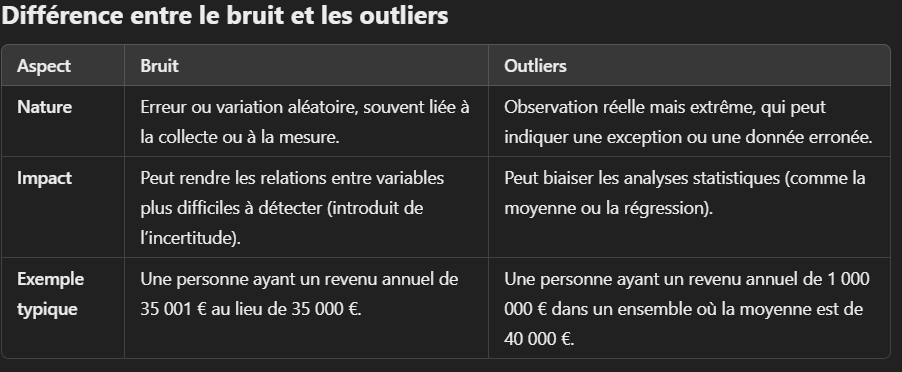

About the distribution, almost all the numerical features follow the gaussian distribution except the LengthOfCreditHistory.

## 4.3. Identification of the target attributs

 - For the regression task: the target variable is continuous and it's the RiskScore, that will be predicted.
 - For the classification task: the target variable is the discret feauture LoanApproved. It takes two possible values, '0' for the Class 0 and '1' for the Class 1, so it's a binary classification.

In [33]:
#Getting the target columns

#Target of the regression task: The countinuous feature RiskScore
y_reg=loans_df["RiskScore"]

#Target of the classification task: The discret feature LoanApproved
y_clf=loans_df["LoanApproved"]
y_clf.value_counts()

#selecting the data (without the target features)
all_columns.remove('LoanApproved')
all_columns.remove( 'RiskScore')
X=loans_df[all_columns]

In [34]:
#let's verifiy the shapes
X.shape, y_reg.shape, y_clf.shape

((20000, 34), (20000,), (20000,))

## 4.4. Creating a Test Set

Why do we need to sample the dataset at this stage? 
"It may sound a bit strange to voluntarily set aside	part of	the	data at	this stage.	After
 all,	you	have	only	taken	a	quick	glance	at	the	data,	and	surely	you	should	learn	 
 whole	lot	more	about	it	before	you	decide	what	algorithms	to	use,	right?	This	 
 true,	but	your	brain	is	an	amazing	pattern	detection	system,	which	means	that	it
 is	highly	prone	to	overfitting:	if	you	look	at	the	test	set,	you may	stumble	 on
 some	seemingly	interesting	pattern	in	the	test	data	that	leads	you	to	sel t	a
 particular	kind	of	Machine	Learning	model.	When	you	estima 	the
 generalization	error	using	the	test	set,	your	estimate	will	be	too	optimis c	and
 you	will	launch	a	system	that	will	not	perform	as	well	as	ex**pect d. This	i call d
 datg bias**p" \[Hands On Machine Learning with Scikit-Learn-Aurelien Geron book\]ing	bias.

In [56]:
#splitting for regression task 
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=1)
#spliting for classification task 
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=1)

#Remark: the two task have the same X_train and X_test 

In [60]:
#check the shapes 
X_train.shape, X_test.shape, y_reg_train.shape, y_reg_test.shape, y_clf_train.shape, y_clf_test.shape

((16000, 34), (4000, 34), (16000,), (4000,), (16000,), (4000,))

## 4.4. Data Visualization 

So	far	we	have	only	taken	a	quick	glance	at	the	data	to	get	a	general
understanding	of	the	kind	of	data	we are	manipulating.	Now	the	goal	is	to	go	a little	bit	more	in	depth.

 > Remark: For the rest the exploration, the sample test set, we are going to put it aside, and don't look at it!h.

### 4.4.1. Which visualizations are we going to use? 

1. Understand Feature Distributions
Visualizations to understand individual variables.

Histogram / KDE Plot
Why: To understand the distribution of numerical features (e.g., Age, AnnualIncome).
What to do:
Check for skewness, uniformity, or multimodal distributions.
Identify outliers or extreme values

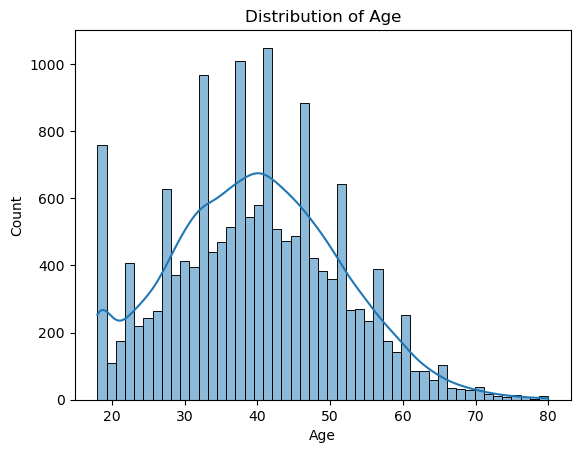

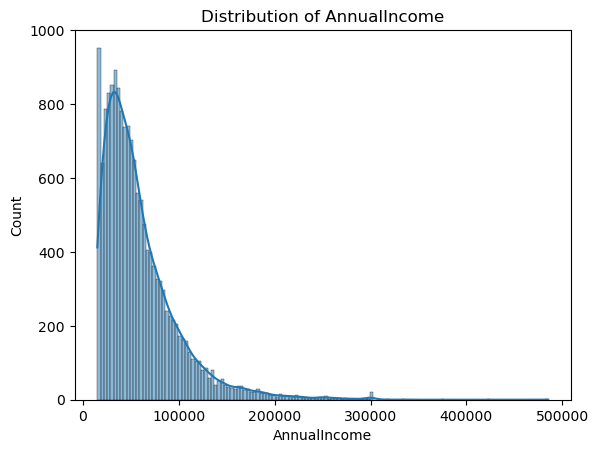

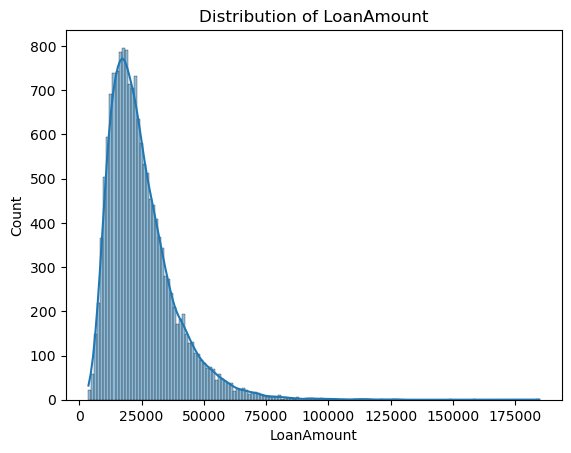

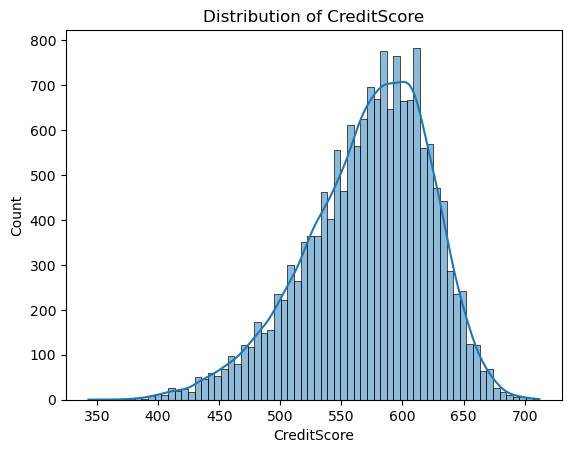

In [83]:

numerical_features = ['Age', 'AnnualIncome', 'LoanAmount', 'CreditScore']
for feature in numerical_features:
    sns.histplot(data=X_train, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

2. Identify Relationships Between Variables
Visualizations to detect relationships or correlations.

Pairplot
Why: To explore relationships between pairs of numerical features.

What to do:

Focus on key variables like Age, LoanAmount, AnnualIncome, and RiskScore.
Look for clusters, linear relationships, or outliers.

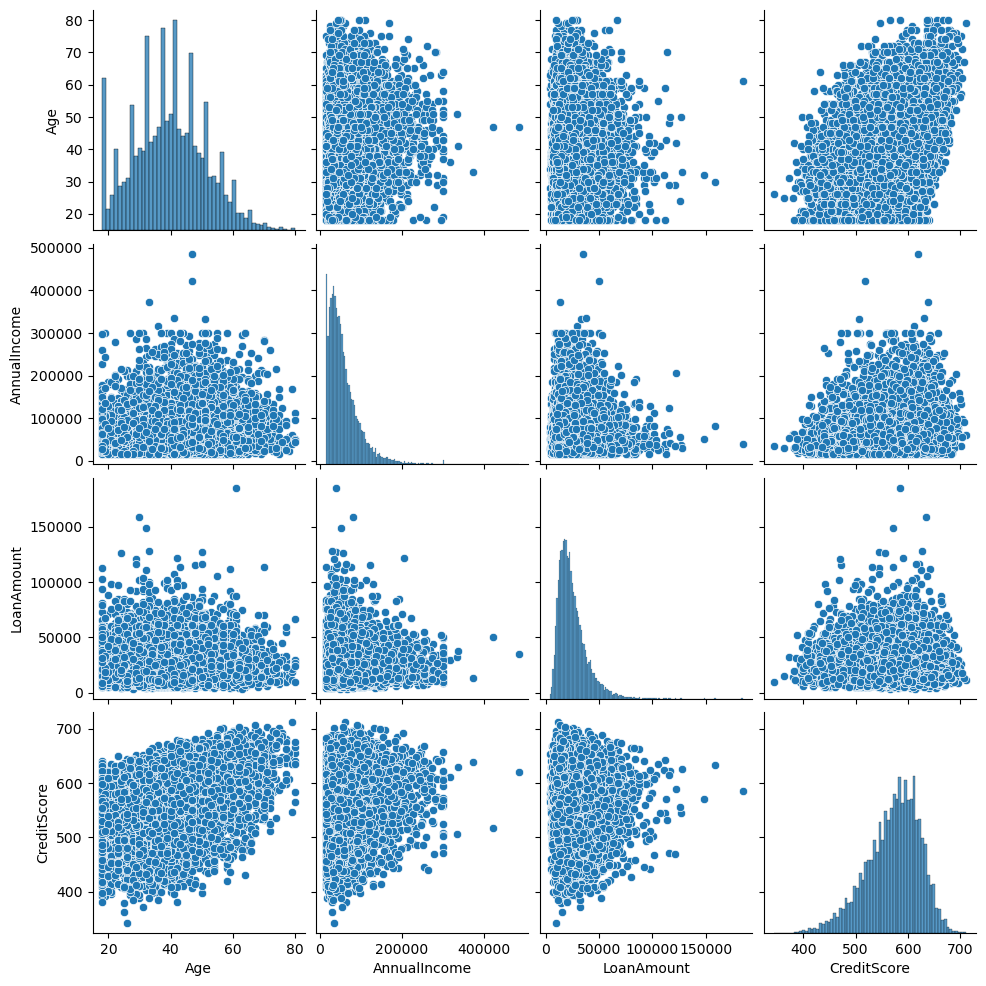

In [90]:
sns.pairplot(X_train[['Age', 'AnnualIncome', 'LoanAmount', 'CreditScore']])
plt.show()


3. Explore Categorical Features
Visualizations to summarize and compare categorical variables.

Bar Plot
Why: To visualize the distribution of categories (e.g., EmploymentStatus, EducationLevel, MaritalStatus).
What to do:
Count the occurrences of each category and identify imbalances.


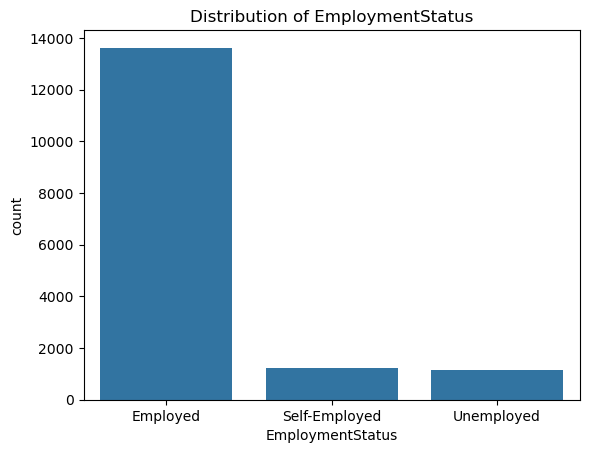

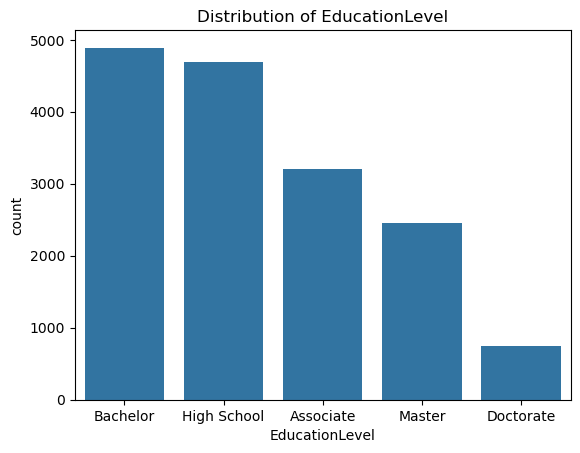

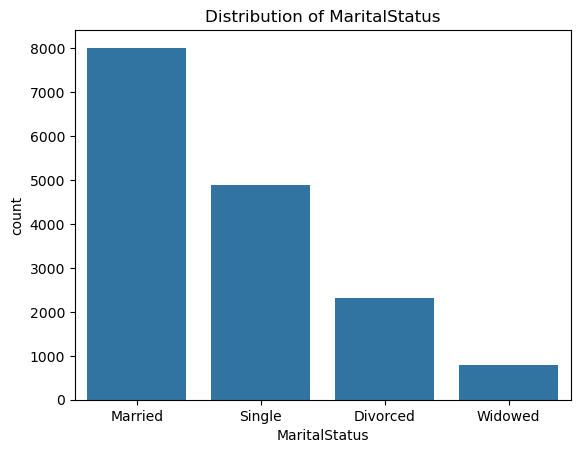

In [98]:
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus']
for feature in categorical_features:
    sns.countplot(data=X_train, x=feature, order=X_train[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()


Boxplot for Numerical Data by Categorical Feature
Why: To examine how numerical features (e.g., LoanAmount, RiskScore) vary across categories.

What to do:

Use boxplots for variables like LoanAmount grouped by EmploymentStatus or MaritalStatus.
python
Copier le code


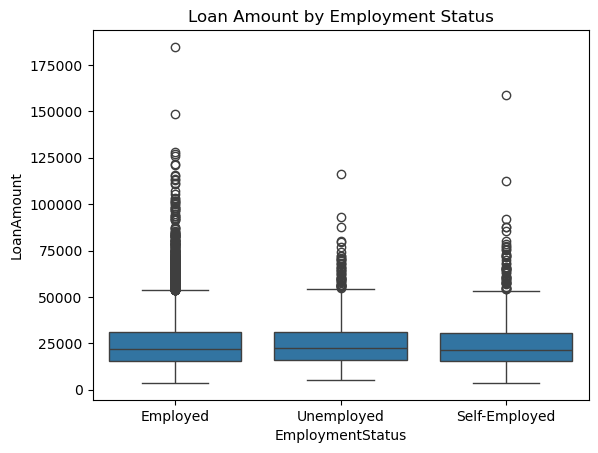

In [100]:
sns.boxplot(data=X_train, x='EmploymentStatus', y='LoanAmount')
plt.title("Loan Amount by Employment Status")
plt.show()


# 5. Data preparation 

# 5. Model selection

# 6. Model training

# 7. Evaluation 

# 8. Conclusion